https://github.com/aayushmnit/fastai_v3_experimentation/blob/master/Lesson-1-PlantVintage.ipynb

https://github.com/aayushmnit/Deep_learning_explorations/tree/master/8_Image_similarity_search

<details>
<summary>Heading</summary>

+ markdown list 1
    + nested list 1
    + nested list 2
+ markdown list 2

</details>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import pickle
import numpy as np
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
import matplotlib.pyplot as plt
from lshash import *
from PIL import Image
from tqdm import tqdm_notebook
pd.set_option('display.max_columns', 500)

In [4]:
## Declaring path of dataset
path = Path('../artificio/process_image/train/')

## Loading data and Normalizing data based on Image net parameters
#ds_tfms = get_transforms()
tfms = get_transforms(
    do_flip=False, 
    flip_vert=False, 
    max_rotate=0, 
    max_lighting=0, 
    max_zoom=1, 
    max_warp=0
)



data = (ImageList.from_folder(path)
        .random_split_by_pct(0.2)
        .label_from_folder()
        .transform(tfms=tfms, size=224)
        .databunch(bs=64))

/home/redne/anaconda3/envs/pytorch/lib/python3.7/site-packages/fastai/data_block.py:212: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


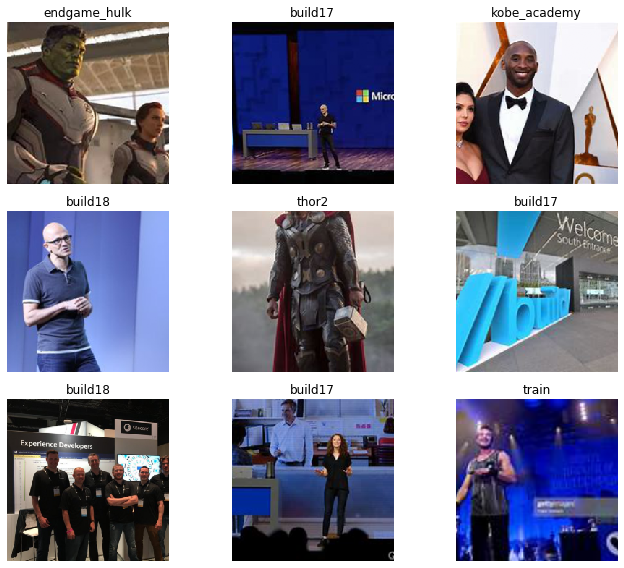

In [5]:
data.show_batch(rows=3, figsize=(10,8))

In [6]:
print(data.classes)
len(data.classes),data.c

['build17', 'build18', 'build19', 'endgame_hulk', 'endgame_thor', 'endgame_tony', 'gladwell', 'ironman1', 'kobe_academy', 'mc', 'msa', 'ragnarok', 'thor2', 'train', 'zoo', 'zuckerberg']


(16, 16)

In [7]:
## To create a ResNET 50 with pretrained weights
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/home/redne/anaconda3/envs/pytorch/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [10]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,4.425376,3.012236,0.767442,00:19
1,3.119192,2.977171,0.651163,00:03
2,2.193336,2.803760,0.534884,00:03
3,1.657258,2.473981,0.418605,00:03
4,1.340052,2.212463,0.395349,00:03


In [11]:
learn.save('experiment1')

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

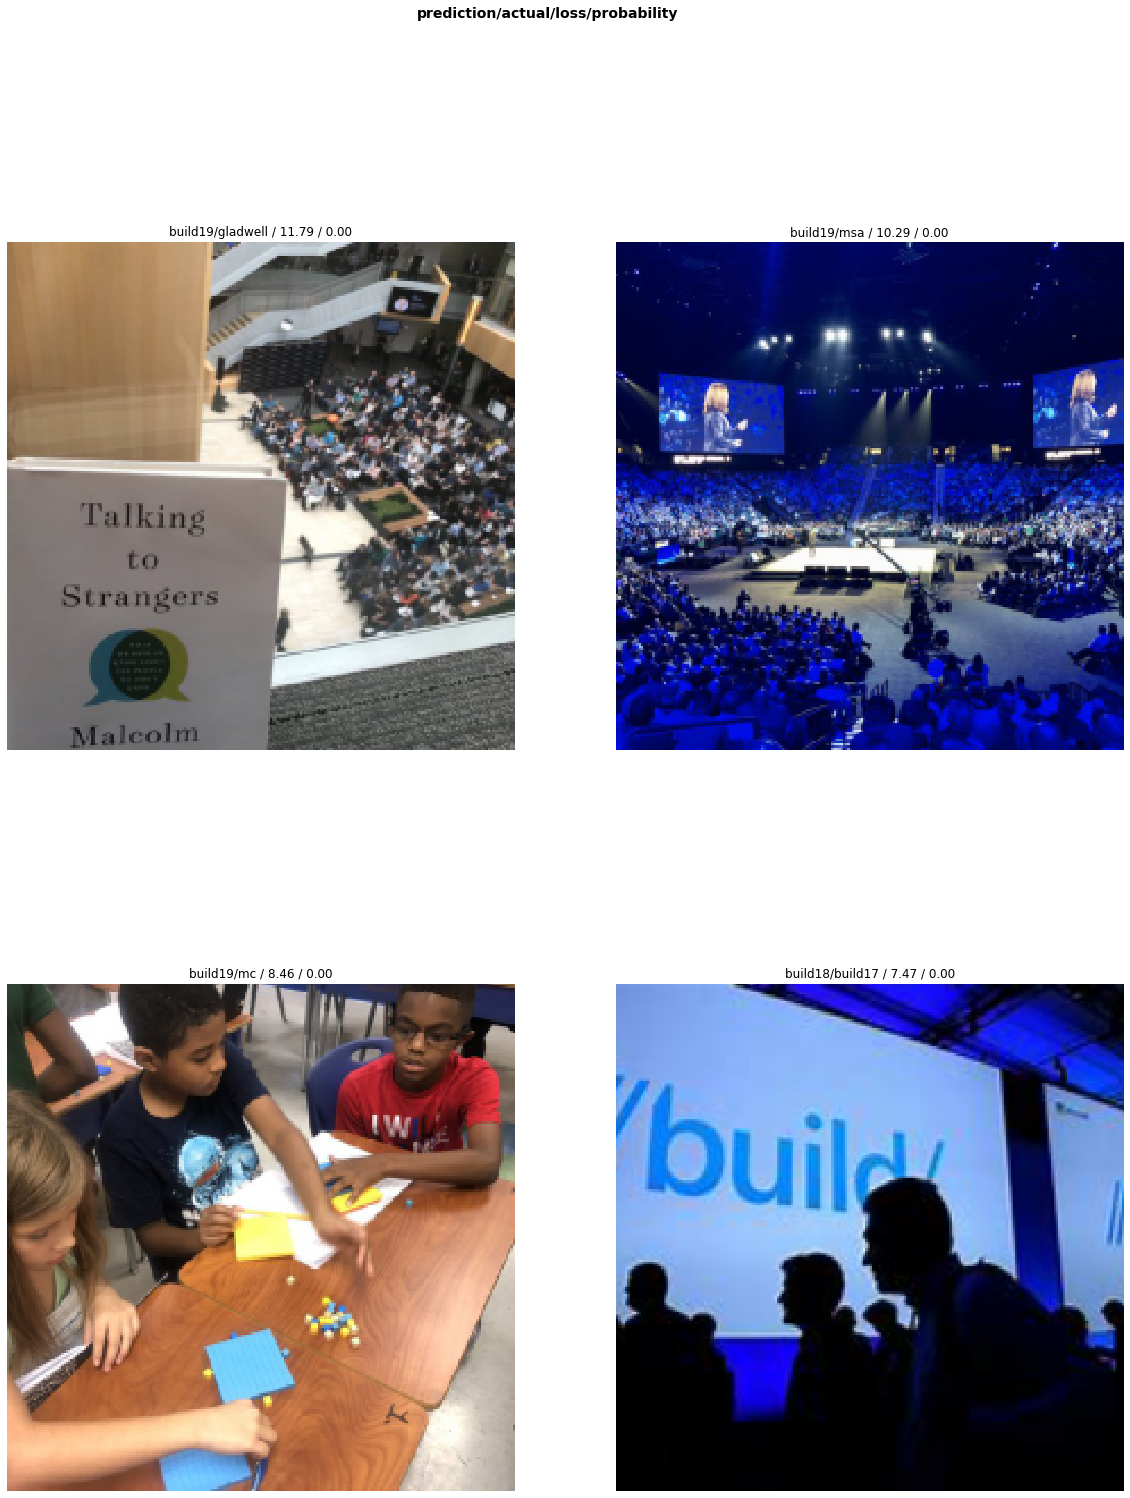

In [13]:
interp.plot_top_losses(4, figsize=(20,25))

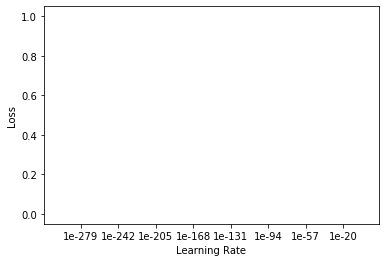

In [14]:
learn.recorder.plot()